In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [44]:
def apply_fog(image_rgb, fog_strength=0.3):
    """
    Apply fog effect to an RGB image.

    Parameters:
        image_rgb (np.ndarray): Input RGB image.
        fog_strength (float): Blend ratio for fog (0 to 1). Higher means more fog.

    Returns:
        np.ndarray: Foggy RGB image.
    """
    fog_layer = np.full_like(image_rgb, 255)
    foggy_image = cv2.addWeighted(image_rgb, 1 - fog_strength, fog_layer, fog_strength, 0)
    return foggy_image


In [45]:
def defog_image(foggy_rgb):
    """
    Defog an RGB image using CLAHE on the LAB lightness channel.

    Parameters:
        foggy_rgb (np.ndarray): Foggy RGB image.

    Returns:
        np.ndarray: Defogged RGB image.
    """
    # Convert to LAB color space
    lab = cv2.cvtColor(foggy_rgb, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)

    # Apply CLAHE to the L channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_clahe = clahe.apply(l)

    # Merge and convert back to RGB
    lab_clahe = cv2.merge((l_clahe, a, b))
    defogged_rgb = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2RGB)

    return defogged_rgb

In [46]:
def equalize_histogram(image):
    """
    Apply histogram equalization to a grayscale or RGB image.

    Parameters:
        image (np.ndarray): Input image (grayscale or RGB).

    Returns:
        np.ndarray: Histogram-equalized image.
    """
    if image.ndim == 2:  # Grayscale
        return cv2.equalizeHist(image)

    elif image.ndim == 3 and image.shape[2] == 3:  # RGB
        equalized = np.zeros_like(image)
        for i in range(3):  # R, G, B channels
            equalized[:, :, i] = cv2.equalizeHist(image[:, :, i])
        return equalized

    else:
        raise ValueError("Input must be a grayscale or 3-channel RGB image.")

In [47]:
def plot_images(titles, images, max_cols=4, height_per_row=4):
    """
    Plot RGB or grayscale images in an auto-adjusted grid layout.

    Parameters:
        titles (list of str): Titles for each image.
        images (list of np.ndarray): RGB or grayscale images to display.
        max_cols (int): Maximum number of columns per row.
        height_per_row (int): Height per row in inches.
    """
    if not titles or not images:
        raise ValueError("Both titles and images must be non-empty lists.")
    if len(titles) != len(images):
        raise ValueError("Titles and images must have the same length.")

    num_images = len(images)
    cols = min(num_images, max_cols)
    rows = math.ceil(num_images / cols)
    figsize = (cols * 4, rows * height_per_row)

    plt.figure(figsize=figsize)
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        img = images[i]
        if isinstance(img, np.ndarray):
            if img.ndim == 2:  # Grayscale
                plt.imshow(img, cmap='gray')
            else:  # RGB
                plt.imshow(img)
        else:
            raise TypeError(f"Item at index {i} is not a valid image array.")
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()


In [48]:
def plot_histograms( images, titles, max_cols=4, height_per_row=4):
    """
    Plot RGB histograms for a list of images in an auto-adjusted grid layout.

    Parameters:
        images (list of np.ndarray): List of RGB images.
        titles (list of str): Corresponding titles for each image.
        max_cols (int): Maximum number of columns per row.
        height_per_row (int): Height per row in inches.
    """
    assert len(images) == len(titles), "Images and titles must have the same length."

    num_images = len(images)
    cols = min(num_images, max_cols)
    rows = math.ceil(num_images / cols)
    figsize = (cols * 4, rows * height_per_row)

    plt.figure(figsize=figsize)
    for idx, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, idx + 1)
        for i, color in enumerate(('r', 'g', 'b')):
            hist = cv2.calcHist([img], [i], None, [256], [0, 256])
            plt.plot(hist, color=color)
        plt.title(f'Histogram: {title}')
        plt.xlim([0, 256])
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.grid(True)
    plt.tight_layout()
    plt.show()

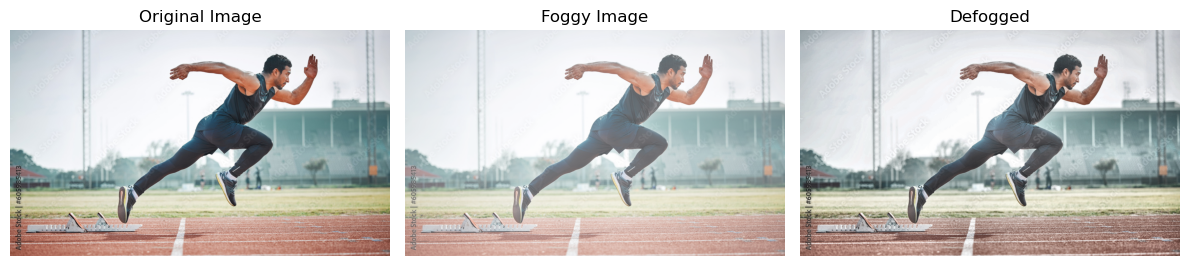

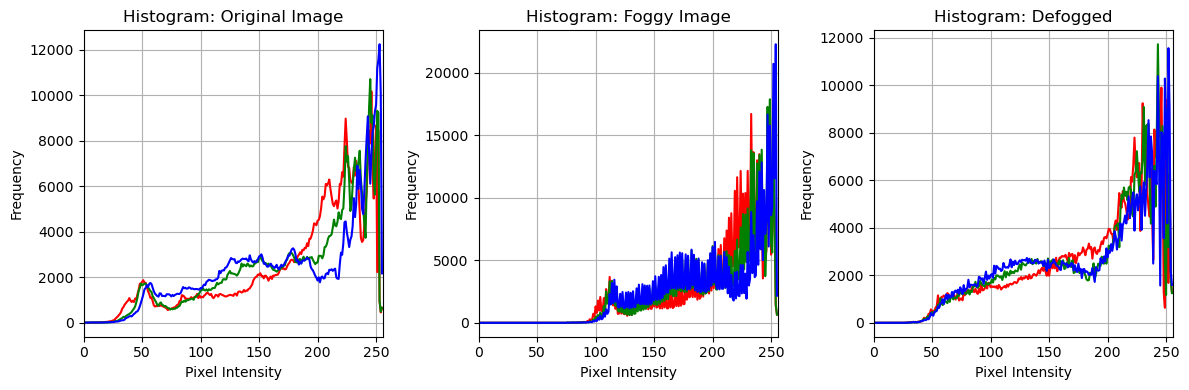

In [49]:
img = cv2.imread('image.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Simulate fog
foggy = apply_fog(img_rgb)
defogged = defog_image(foggy)

# Display all images
titles = ['Original Image', 'Foggy Image', 'Defogged']
images = [img_rgb, foggy, defogged]

plot_images(titles, images)
plot_histograms(images, titles)


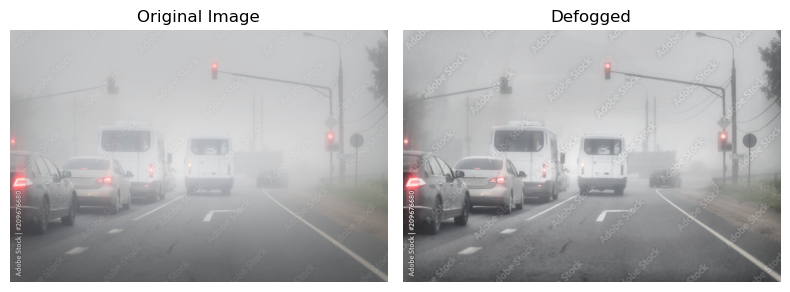

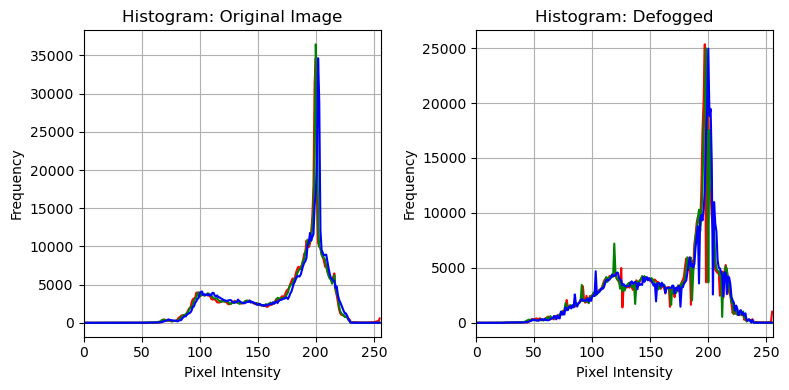

In [41]:
img = cv2.imread('foggy_image3.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Simulate fog
#foggy = apply_fog(img_rgb)
defogged = defog_image(img_rgb)
hist_equalized = equalize_histogram(defogged)
# Display all images
titles = ['Original Image',  'Defogged', "Histogram Equalized"]
images = [img_rgb, defogged, hist_]

plot_images(titles, images)
plot_histograms(images, titles)